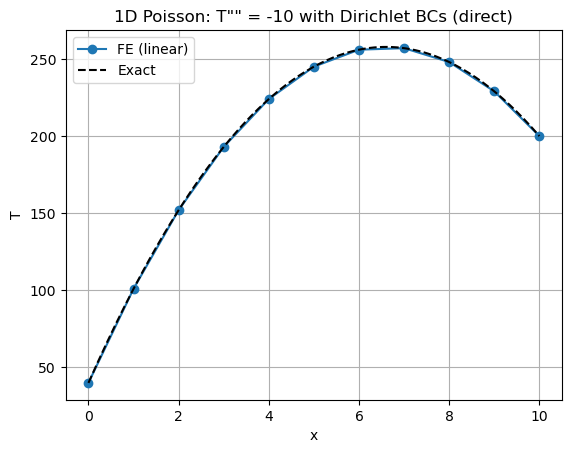

Nodes x: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
FE T: [ 40. 101. 152. 193. 224. 245. 256. 257. 248. 229. 200.]
Exact at nodes: [ 40. 101. 152. 193. 224. 245. 256. 257. 248. 229. 200.]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Problem: T'' = -f(x), f=10 on [0,L], T(0)=40, T(L)=200
L = 10.0
T0, TL = 40.0, 200.0
f_val = 10.0

nel = 10                 # number of linear elements
nn  = nel + 1            # number of nodes
x   = np.linspace(0, L, nn)
h   = L / nel

# Assemble global stiffness K and load vector F
K = np.zeros((nn, nn))
F = np.zeros(nn)

for e in range(nel):
    nodes = [e, e + 1]

    # Element stiffness and load (linear 2-node element)
    ke = (1.0 / h) * np.array([[ 1, -1],
                               [-1,  1]])
    fe = f_val * h / 2.0 * np.array([1, 1])

    # Scatter-add into global arrays
    for iL, iG in enumerate(nodes):
        F[iG] += fe[iL]
        for jL, jG in enumerate(nodes):
            K[iG, jG] += ke[iL, jL]

# --- Direct Dirichlet BC enforcement (elimination / substitution) ---

bc_nodes  = [0, nn - 1]
bc_values = [T0, TL]

# For each prescribed node k: adjust RHS for all equations, then overwrite row/col
for k, Tk in zip(bc_nodes, bc_values):
    # Move known-value contributions to RHS:
    # For every equation i:  K[i,k] * T_k is moved to RHS, then column k is zeroed.
    for i in range(nn):
        F[i] -= K[i, k] * Tk
        if i != k:
            K[i, k] = 0.0

    # Now enforce T_k = Tk by replacing the k-th equation with: 1*T_k = Tk
    K[k, :] = 0.0
    K[k, k] = 1.0
    F[k]    = Tk

T = np.linalg.solve(K, F)

# Exact solution
def T_exact(x):
    return -5.0 * x**2 + 66.0 * x + 40.0

# Plot
x_fine = np.linspace(0, L, 200)
plt.plot(x, T, '-o', label='FE (linear)')
plt.plot(x_fine, T_exact(x_fine), 'k--', label='Exact')
plt.xlabel('x'); plt.ylabel('T')
plt.title('1D Poisson: T"" = -10 with Dirichlet BCs (direct)')
plt.grid(True); plt.legend()
plt.show()

print("Nodes x:", x)
print("FE T:", T)
print("Exact at nodes:", T_exact(x))
